In [1]:
import circularPitchSpace as cps
import matplotlib.pyplot as plt
import librosa.display
import librosa
import madmom
import IPython

# path to jazznet dataset containing sample midi chords
basepath = "/home/max/ET-TI/Masterarbeit/datasets/jazznet/chords/"
chroma_type = 'madmom'
dcp =  madmom.audio.chroma.DeepChromaProcessor()
inversion = 0
octave = 3
chords = {'maj':f"{basepath}maj/C-{octave}-maj-chord-{inversion}.wav",
          'min':f"{basepath}min/C-{octave}-min-chord-{inversion}.wav",
          'dim':f"{basepath}dim/C-{octave}-dim-chord-{inversion}.wav",
          'aug':f"{basepath}aug/C-{octave}-aug-chord-{inversion}.wav",
          'seventh':f"{basepath}seventh/C-{octave}-seventh-chord-{inversion}.wav",
          'dim7':f"{basepath}dim7/C-{octave}-dim7-chord-{inversion}.wav"}


Plot Chromagram for all specified Audiofiles

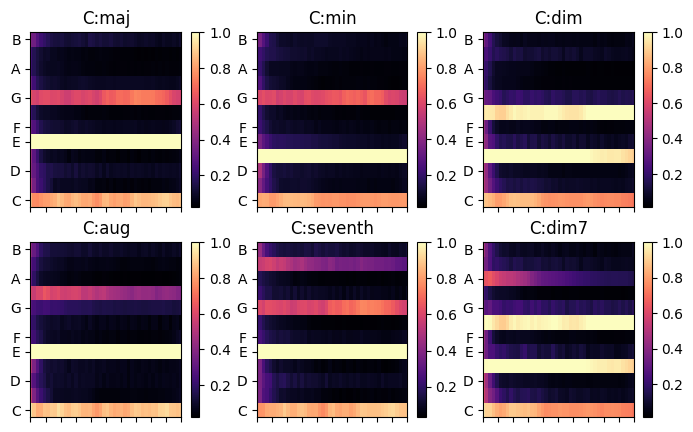

In [2]:

fig = plt.figure(figsize=((8.27,5)))
grid = plt.GridSpec(2, 3, wspace=0.2, hspace=0.2)
chordnames = list(chords.keys())
chordpaths = list(chords.values())
chord_nr = 0
features = {}
for row in range(2):
    for col in range(3):
        fpath = chordpaths[chord_nr]
        label = chordnames[chord_nr]
        chord_nr += 1
        
        # plot Chromagram
        ax = fig.add_subplot(grid[row,col])
        y,sr = librosa.load(fpath,sr=22050)
        chroma = librosa.feature.chroma_cqt(y=y).T
        img = librosa.display.specshow(chroma.T,ax=ax,y_axis='chroma',x_axis='time')
        ax.set_xlabel("")
        ax.set_xticklabels([])
        ax.set_ylabel("")
        ax.set_xlim(0,1)
        ax.set_title(f"C:{label}")
        fig.colorbar(img, ax=ax)

        # save features
        features[label] = cps.transformChroma(chroma)
plt.show()


Text(-1, 1, 'C:maj .. r\nC:min .. y\nC:dim .. b\nC:aug .. k')

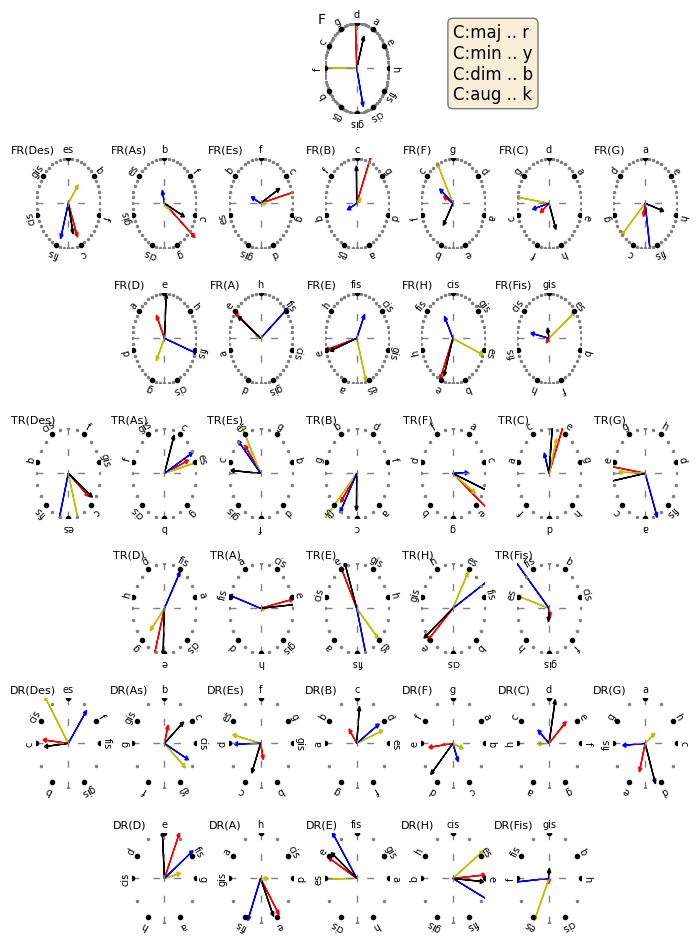

In [17]:
fig,ax_list = cps.plotPitchSpace()
colors = ["r","y","b","k"]
qualities = ["maj",'min','dim','aug']
t_i = 50 # time index
for c,qual in zip(colors,qualities):
    rho_F,rho_FR,rho_TR,rho_DR  = features[qual]
    cps.plotFeatures(ax_list,rho_F[t_i],rho_FR[t_i],rho_TR[t_i],rho_DR[t_i],color=c)
# add legend
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = '\n'.join([f"C:{r} .. {x}" for x,r in zip(colors,qualities)])

# place a text box in upper left in axes coords
ax_list[0][5].text(-1,1, textstr,fontsize=12,
        verticalalignment='top', bbox=props)

Text(-1, 1, 'C:maj .. r\nC:seventh .. y\nC:dim7 .. b')

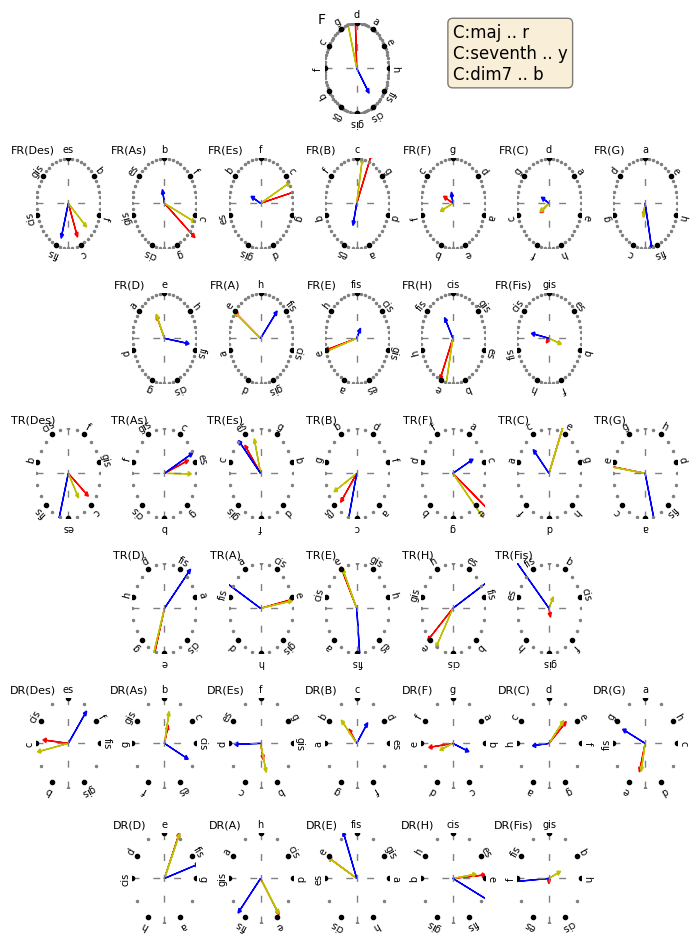

In [18]:
fig,ax_list = cps.plotPitchSpace()
colors = ["r","y","b"]
qualities = ["maj",'seventh','dim7']
t_i = 50 # time index
for c,qual in zip(colors,qualities):
    rho_F,rho_FR,rho_TR,rho_DR  = features[qual]
    cps.plotFeatures(ax_list,rho_F[t_i],rho_FR[t_i],rho_TR[t_i],rho_DR[t_i],color=c)
# add legend
# these are matplotlib.patch.Patch properties
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
textstr = '\n'.join([f"C:{r} .. {x}" for x,r in zip(colors,qualities)])

# place a text box in upper left in axes coords
ax_list[0][5].text(-1,1, textstr,fontsize=12,
        verticalalignment='top', bbox=props)